In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

from mle_toolbox.utils import load_log, hyper_log_to_df

# Load in Meta-Log .hdf5 file storing all individual runs

In [2]:
# Load log and get overview of different logged runs
meta_log = load_log("experiments/meta_log.hdf5")
meta_log.keys()

odict_keys(['b_1_eval_4', 'b_1_eval_2', 'b_2_eval_0', 'b_2_eval_3', 'b_1_eval_3', 'b_2_eval_2', 'b_1_eval_1', 'b_1_eval_0', 'b_2_eval_1'])

In [3]:
# And here are the different items stored in the log
print("Outer level:", meta_log.b_1_eval_0.keys())
print("Meta level:", meta_log.b_1_eval_0.meta.keys())
print("Time level:", meta_log.b_1_eval_0.time.keys())
print("Stats level:", meta_log.b_1_eval_0.stats.keys())

Outer level: odict_keys(['meta', 'stats', 'time'])
Meta level: odict_keys(['config_fname', 'eval_id', 'experiment_dir', 'log_paths', 'network_ckpt', 'seeds'])
Time level: odict_keys(['step_counter', 'time_elapsed'])
Stats level: odict_keys(['integral', 'noise'])


In [4]:
# The meta data stores all the data relevant for recovering parts of the experiment
meta_log.b_1_eval_0.meta.network_ckpt

array(['experiments/21-02-02_b_1_eval_0/networks/21-02-02_b_1_eval_0_seed_173712.pt',
       'experiments/21-02-02_b_1_eval_0/networks/21-02-02_b_1_eval_0_seed_735755.pt'],
      dtype='<U200')

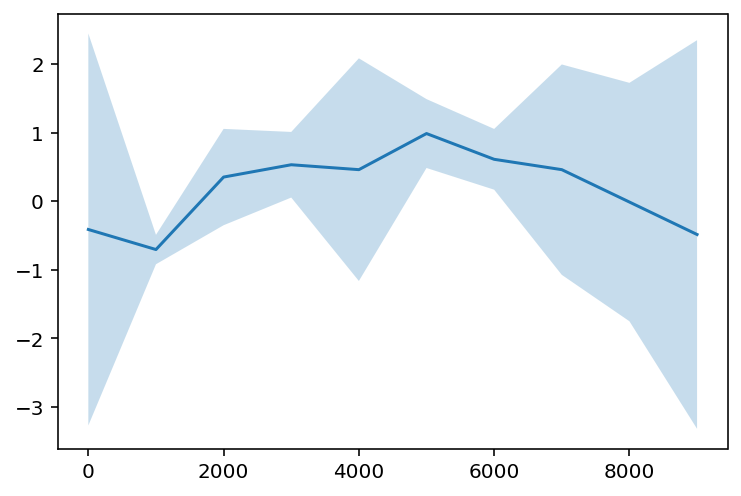

In [5]:
# If you want to get access to a specific variable just index it!
import matplotlib.pyplot as plt
plt.plot(meta_log.b_1_eval_0.time.step_counter.mean,
         meta_log.b_1_eval_0.stats.noise.mean)
plt.fill_between(meta_log.b_1_eval_0.time.step_counter.mean,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 - 2 * meta_log.b_1_eval_0.stats.noise.std,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 + 2 * meta_log.b_1_eval_0.stats.noise.std,
                 alpha=0.25)

# Visualize a Time Series/Learning Curve

/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


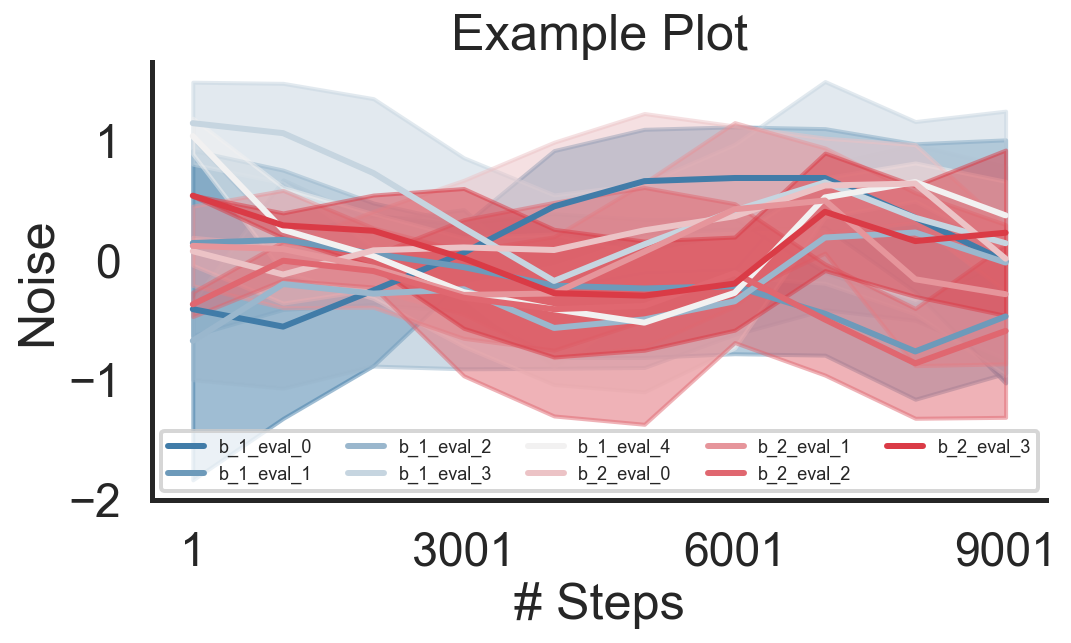

In [6]:
from mle_toolbox.visualize import visualize_1D_lcurves

fig, ax = visualize_1D_lcurves(meta_log,
                               iter_to_plot="step_counter",
                               target_to_plot="noise",
                               smooth_window=3,
                               plot_title= "Example Plot",
                               xy_labels = [r"# Steps",
                                            r"Noise"],
                               base_label=r"{}",
                               curve_labels=[],
                               every_nth_tick= 3,
                               plot_std_bar= True)
ax.legend(ncol=5, fontsize=9)

# Load in Hyper-DF .pkl file 
## Stores all the hyperparameters of runs and more details

In [7]:
hyper_df = hyper_log_to_df("experiments/hyper_log.pkl")
hyper_df.columns

Index(['noise_mean', 'x_0', 'time_elapsed', 'run_id', 'integral', 'noise',
       'log_paths', 'experiment_dir', 'network_ckpt', 'seeds', 'log_fname'],
      dtype='object')

In [8]:
# Take a lookilooki - You can easily access checkpoints/individual logs 
# from the hyper_df
hyper_df

,noise_mean,x_0,time_elapsed,run_id,integral,noise,log_paths,experiment_dir,network_ckpt,seeds,log_fname
0,0.000,1.0,20.884175,b_1_eval_0,-0.029870,-0.484937,[experiments/21-02-02_b_1_eval_0/logs/21-02-02...,experiments/21-02-02_b_1_eval_0/,[experiments/21-02-02_b_1_eval_0/networks/21-0...,"[173712, 735755]",experiments/21-02-02_b_1_eval_0/logs/b_1_eval_...
1,0.000,5.5,20.884175,b_1_eval_1,0.049474,0.741304,[experiments/21-02-02_b_1_eval_1/logs/21-02-02...,experiments/21-02-02_b_1_eval_1/,[experiments/21-02-02_b_1_eval_1/networks/21-0...,"[173712, 735755]",experiments/21-02-02_b_1_eval_1/logs/b_1_eval_...
2,0.000,10.0,20.884175,b_1_eval_2,-0.008667,-0.865229,[experiments/21-02-02_b_1_eval_2/logs/21-02-02...,experiments/21-02-02_b_1_eval_2/,[experiments/21-02-02_b_1_eval_2/networks/21-0...,"[173712, 735755]",experiments/21-02-02_b_1_eval_2/logs/b_1_eval_...
3,0.005,1.0,20.884175,b_1_eval_3,0.059726,-0.028755,[experiments/21-02-02_b_1_eval_3/logs/21-02-02...,experiments/21-02-02_b_1_eval_3/,[experiments/21-02-02_b_1_eval_3/networks/21-0...,"[173712, 735755]",experiments/21-02-02_b_1_eval_3/logs/b_1_eval_...
4,0.005,5.5,20.884175,b_1_eval_4,0.026295,0.042855,[experiments/21-02-02_b_1_eval_4/logs/21-02-02...,experiments/21-02-02_b_1_eval_4/,[experiments/21-02-02_b_1_eval_4/networks/21-0...,"[173712, 735755]",experiments/21-02-02_b_1_eval_4/logs/b_1_eval_...
5,0.005,10.0,17.281491,b_2_eval_0,0.066130,-1.387723,[experiments/21-02-02_b_2_eval_0/logs/21-02-02...,experiments/21-02-02_b_2_eval_0/,[experiments/21-02-02_b_2_eval_0/networks/21-0...,"[173712, 735755]",experiments/21-02-02_b_2_eval_0/logs/b_2_eval_...
6,0.010,1.0,17.281491,b_2_eval_1,0.098027,0.124328,[experiments/21-02-02_b_2_eval_1/logs/21-02-02...,experiments/21-02-02_b_2_eval_1/,[experiments/21-02-02_b_2_eval_1/networks/21-0...,"[173712, 735755]",experiments/21-02-02_b_2_eval_1/logs/b_2_eval_...
7,0.010,5.5,17.281491,b_2_eval_2,0.100692,0.595784,[experiments/21-02-02_b_2_eval_2/logs/21-02-02...,experiments/21-02-02_b_2_eval_2/,[experiments/21-02-02_b_2_eval_2/networks/21-0...,"[173712, 735755]",experiments/21-02-02_b_2_eval_2/logs/b_2_eval_...
8,0.010,10.0,17.281491,b_2_eval_3,0.107773,0.358202,[experiments/21-02-02_b_2_eval_3/logs/21-02-02...,experiments/21-02-02_b_2_eval_3/,[experiments/21-02-02_b_2_eval_3/networks/21-0...,"[173712, 735755]",experiments/21-02-02_b_2_eval_3/logs/b_2_eval_...


# Plot 2D Heatmap of tracked variable

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa3ae185b70>)

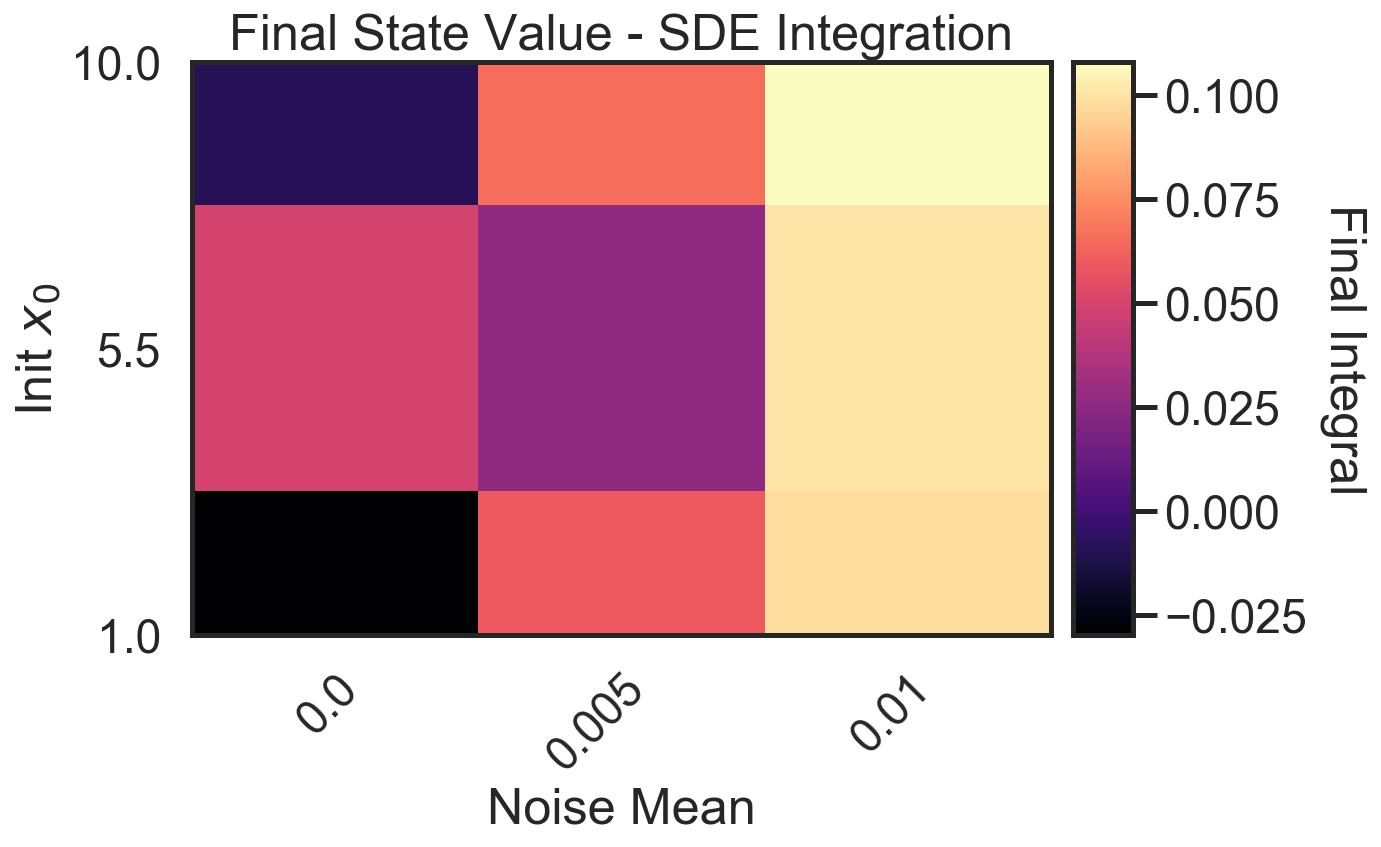

In [12]:
from mle_toolbox.visualize import visualize_2D_grid
fixed_params = None
params_to_plot = ["noise_mean", "x_0"]
target_to_plot = "integral"
visualize_2D_grid(hyper_df, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Final State Value - SDE Integration',
                  xy_labels=[r'Noise Mean', r'Init $x_0$'],
                  variable_name='Final Integral',
                  every_nth_tick=1, round_ticks=3,
                  text_in_cell=False, max_heat=None)